In [23]:
import ramCOH.functions as f
import ramCOH.processing as ram
import numpy as np
import matplotlib.pyplot as plt
import meltInc.plotStyle as ps

ps.layout()

In [17]:
ol_file = "./olivine/PI089-04-01_2022_03_01_15_29_33_532nm_Edge_100�_x50_VIS_LWD_H150_1800 (450-850nm)_5s x 2_01.txt"
x, y = np.genfromtxt(ol_file, unpack=True)

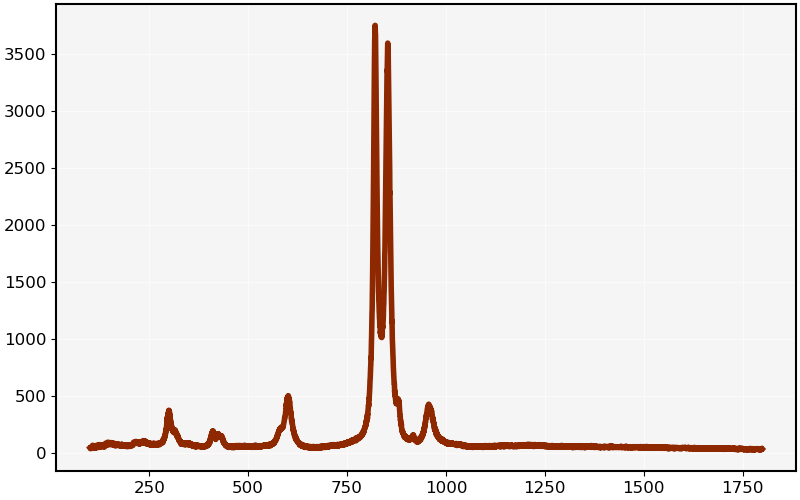

In [18]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(x, y)
plt.show()

In [19]:
birs = np.array(
    [
        [100, 140],
        [370, 380],
        [470, 515],
        [680, 740],
        [1020, 4000]
    ]
)

In [20]:
olivine = ram.olivine(x, y)
olivine.baselineCorrect(birs, smooth=1e-7)
olivine.deconvolve(noise_threshold=1.3, fit_window=4, peak_prominence=3)



/Users/thomas/Desktop/ramCOH/ramCOH/functions.py:519: UserWarning: Noise increased from last iteration, using previous result
  warnings.warn("Noise increased from last iteration, using previous result")


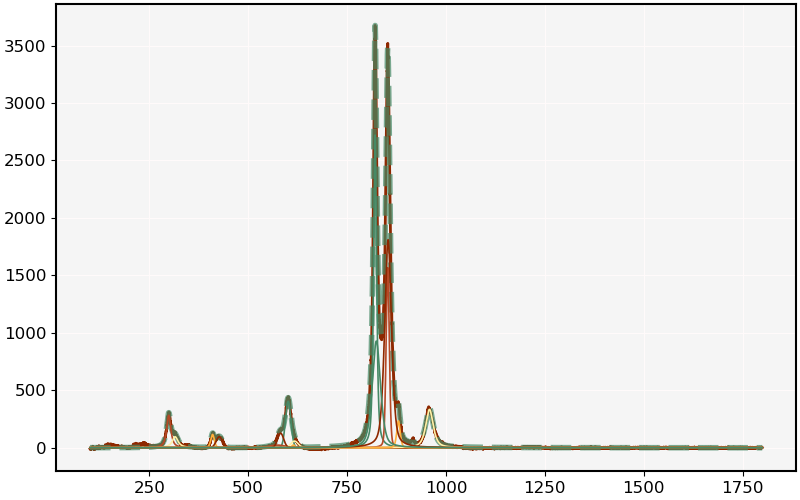

In [27]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(olivine.x, olivine.intensities["BC"], linewidth=2)
plt.plot(olivine.x, f.sum_GaussLorenz(olivine.x, *olivine.deconvolution_parameters), alpha=0.7, linestyle="dashed")
# plt.plot(x, spline)
for curve in olivine.peaks:
    plt.plot(olivine.x, f.GaussLorentz(olivine.x, **curve), linewidth=1.2)

In [26]:
olivine.peaks

[{'center': 299.23946811050206,
  'amplitude': 282.660636794658,
  'width': 5.963973494519439,
  'shape': 0.8474089875985896,
  'baselevel': 0.0},
 {'center': 315.4217423286088,
  'amplitude': 95.54229464603337,
  'width': 8.860293152882475,
  'shape': 0.9999999999999936,
  'baselevel': 0.0},
 {'center': 409.9544108491159,
  'amplitude': 115.74072129079354,
  'width': 4.716172594535714,
  'shape': 0.33619281484233315,
  'baselevel': 0.0},
 {'center': 426.9554171183338,
  'amplitude': 95.95612072333087,
  'width': 7.9198436909790715,
  'shape': 3.0339692361267048e-21,
  'baselevel': 0.0},
 {'center': 601.1603434401952,
  'amplitude': 404.2053891688034,
  'width': 6.829919143831864,
  'shape': 1.0900312757331733e-38,
  'baselevel': 0.0},
 {'center': 574.2633003959163,
  'amplitude': 23.08499806152488,
  'width': 20.719306220154397,
  'shape': 6.423380495422981e-39,
  'baselevel': 0.0},
 {'center': 617.209124472817,
  'amplitude': 57.91692662653473,
  'width': 9.194622034246029,
  'shape'